In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# データの読み込み
data = pd.read_excel('data.xlsx',header = 1)

# ミネラルデータの標準化
minerals = ['Al', 'Ca', 'Cu', 'Fe', 'K', 'Mg', 'Mn', 'Na', 'Zn']
X_minerals = data[minerals]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_minerals)

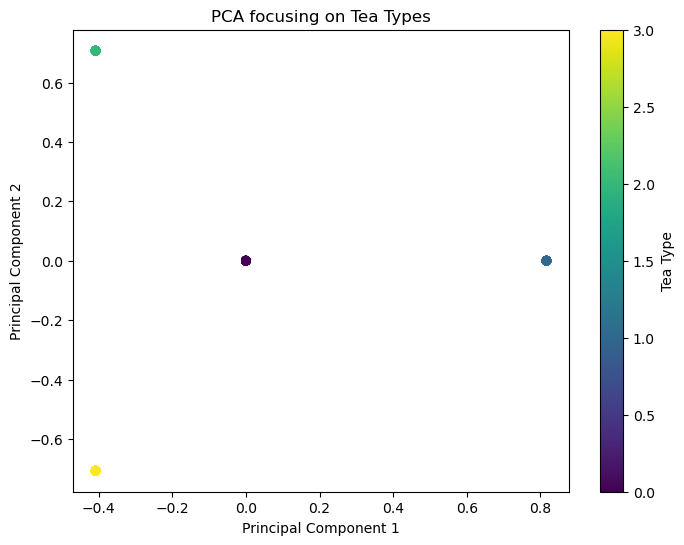

In [3]:
# 茶の種類データのエンコード
tea_types = pd.get_dummies(data['tea'], drop_first=True)

# 1. 茶の種類に焦点を当てたPCA
pca_tea = PCA(n_components=2)
X_tea_pca = pca_tea.fit_transform(tea_types)

# 2. ミネラル組成に焦点を当てたPCA
pca_minerals = PCA(n_components=2)
X_minerals_pca = pca_minerals.fit_transform(X_scaled)

# 茶の種類PCAのバイプロット
plt.figure(figsize=(8, 6))
plt.scatter(X_tea_pca[:, 0], X_tea_pca[:, 1], c=data['tea'].astype('category').cat.codes, cmap='viridis')
plt.title('PCA focusing on Tea Types')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Tea Type')
plt.show()

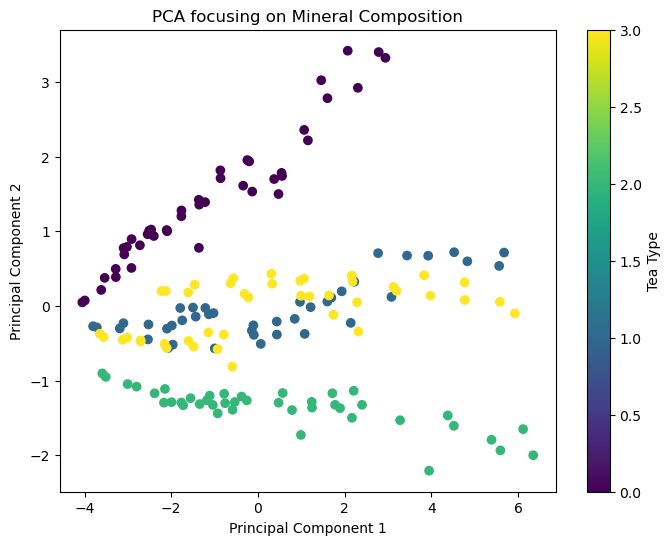

In [4]:
# ミネラル組成PCAのバイプロット
plt.figure(figsize=(8, 6))
plt.scatter(X_minerals_pca[:, 0], X_minerals_pca[:, 1], c=data['tea'].astype('category').cat.codes, cmap='viridis')
plt.title('PCA focusing on Mineral Composition')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Tea Type')
plt.show()

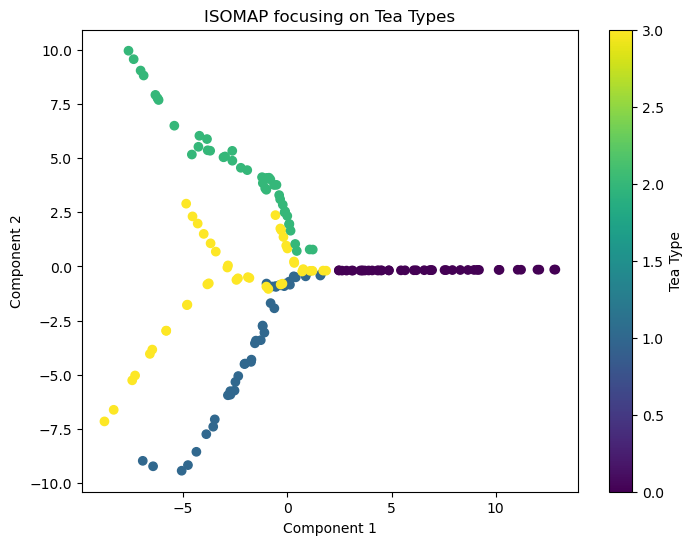

In [5]:
# 3. ISOMAPの実施
isomap = Isomap(n_neighbors=5, n_components=2, metric='euclidean')
X_isomap = isomap.fit_transform(X_scaled)

# ISOMAPのバイプロット
plt.figure(figsize=(8, 6))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=data['tea'].astype('category').cat.codes, cmap='viridis')
plt.title('ISOMAP focusing on Tea Types')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Tea Type')
plt.show()

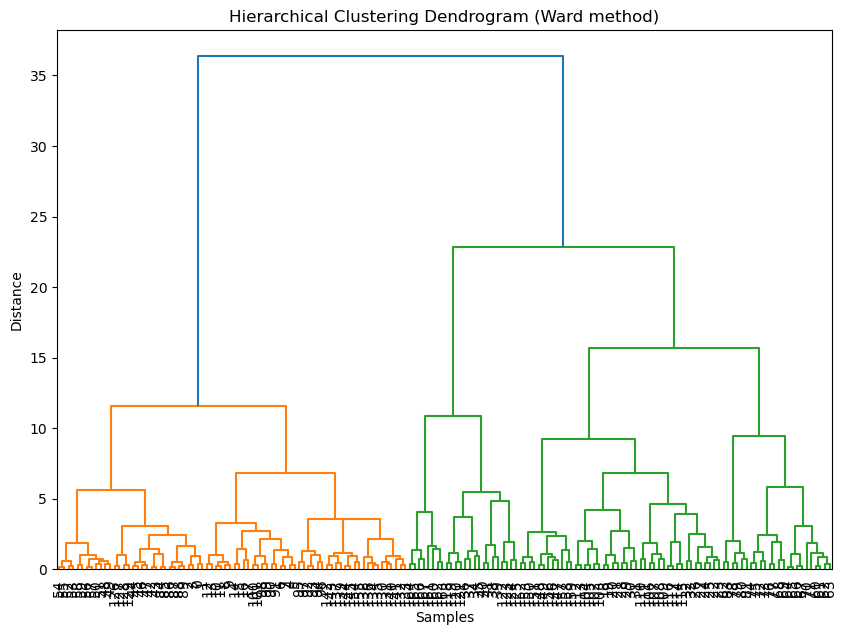

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# データの読み込み
data = pd.read_excel('data.xlsx',header = 1)

# ミネラルデータの抽出と標準化
minerals = ['Al', 'Ca', 'Cu', 'Fe', 'K', 'Mg', 'Mn', 'Na', 'Zn']
X_minerals = data[minerals]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_minerals)

# 階層的クラスター分析の実行（Ward法、ユークリッド距離）
Z = linkage(X_scaled, method='ward', metric='euclidean')

# 樹状図のプロット
plt.figure(figsize=(10, 7))

# インデックス番号をラベルに使用
dendrogram(Z, leaf_rotation=90, leaf_font_size=10)

plt.title('Hierarchical Clustering Dendrogram (Ward method)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


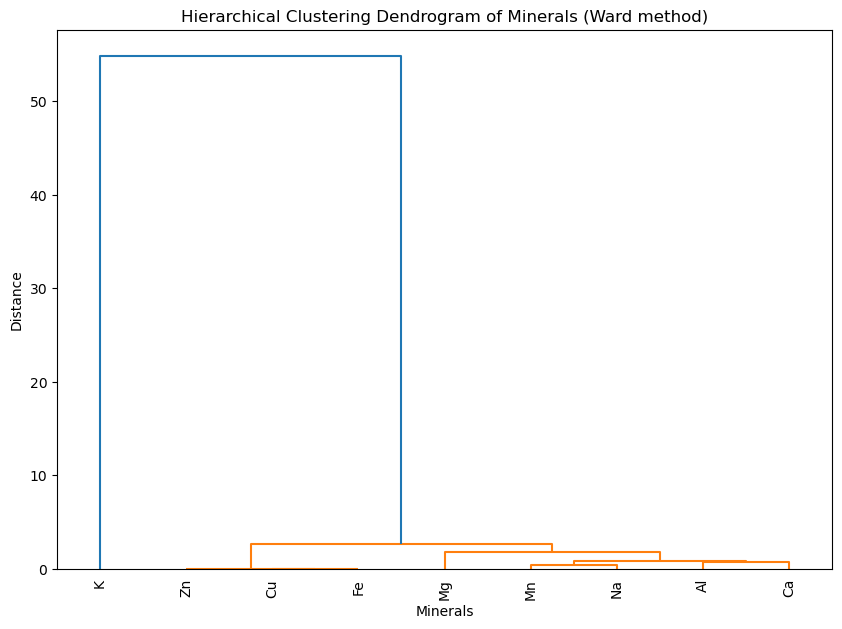

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# データの読み込み
data = pd.read_excel('data.xlsx',header = 1)

# ミネラルデータの抽出と標準化
minerals = ['Al', 'Ca', 'Cu', 'Fe', 'K', 'Mg', 'Mn', 'Na', 'Zn']
X_minerals = data[minerals]

# データの転置（ミネラルをクラスタリングするため）
X_minerals_transposed = X_minerals.T

# 標準化（転置後に標準化を適用）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_minerals_transposed)

# 階層的クラスター分析の実行（Ward法、ユークリッド距離）
Z = linkage(X_scaled, method='ward', metric='euclidean')

# 樹状図のプロット
plt.figure(figsize=(10, 7))

# ミネラルをラベルとして使用
dendrogram(Z, labels=minerals, leaf_rotation=90, leaf_font_size=10)

plt.title('Hierarchical Clustering Dendrogram of Minerals (Ward method)')
plt.xlabel('Minerals')
plt.ylabel('Distance')
plt.show()


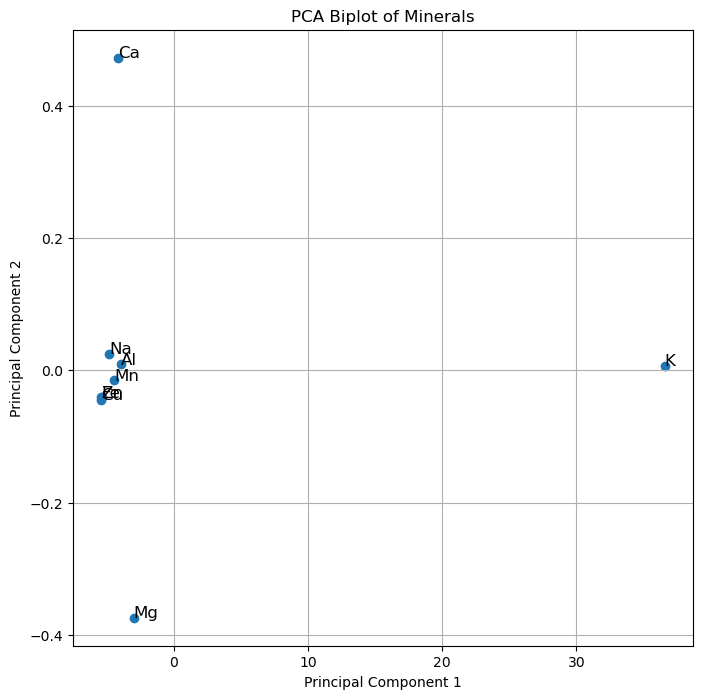

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# データの読み込み
data = pd.read_excel('data.xlsx',header = 1)

# ミネラルデータの抽出
minerals = ['Al', 'Ca', 'Cu', 'Fe', 'K', 'Mg', 'Mn', 'Na', 'Zn']
X_minerals = data[minerals]

# データの転置（行 = ミネラル, 列 = サンプル）
X_minerals_transposed = X_minerals.T

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_minerals_transposed)

# PCAの実行
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# バイプロットの作成
plt.figure(figsize=(8, 8))

# 主成分のプロット
plt.scatter(principal_components[:, 0], principal_components[:, 1])

# ミネラル名のラベル表示
for i, mineral in enumerate(minerals):
    plt.text(principal_components[i, 0], principal_components[i, 1], mineral, fontsize=12)

# グラフの設定
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot of Minerals')
plt.grid(True)

# バイプロットの表示
plt.show()
